<a href="https://colab.research.google.com/github/JamesPeralta/Workout-Predictor-AI/blob/master/Neural-Network/Iteration1/Gymnos_Iteration_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gymnos Iteration 1
## Gymnos iteration 1 will use a single stream 2D convolutional neural network. For each video we will be passing in only one frame and the AIs prediction will be based on the single frame. Therefore the first iteration only analyzes spatial patterns.


---
## Uploading all custom modules into the Instance

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 19.3MB/s 

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [0]:
data_generator_id = '1ICelbrinwuSz6E9I4UbriLy3icM9xNAH'
gymno_DataGenerator = drive.CreateFile({'id': data_generator_id})
gymno_DataGenerator.GetContentFile('GymnoDataGenerator_i1.py')

In [3]:
from google.colab import drive
import os
import csv

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


---
## Imports

In [4]:
import GymnoDataGenerator_i1 as gen

Using TensorFlow backend.


---
## Read in the labels and partitions CSVs


In [0]:
partition = {}
labels = {}

# Load in the Partitions from the CSV
with open("/content/drive/My Drive/GYMNOS/Video Dataset/partitions.csv", mode='r') as partitions_csv:
  csv_reader = csv.DictReader(partitions_csv)
  for row in csv_reader:
    dataset_as_string = row["Dataset"]  # Returns Row as a String
    partition[row["Partition"]] = dataset_as_string[2:-2].split("', '")
    

# Load in the Labels from the CSV
with open("/content/drive/My Drive/GYMNOS/Video Dataset/labels.csv", mode='r') as labels_csv:
  csv_reader = csv.DictReader(labels_csv)
  for row in csv_reader:
    labels[row["Frame_ID"]] = row["Class"]

In [6]:
print(len(partition["train"]))
print(len(partition["validation"]))
print(len(partition["test"]))

3101
886
444


--- 
## Initialize the DataGenerator

In [0]:
import matplotlib.pyplot as plt

In [0]:
# Parameters
params = {'data_location': "/content/drive/My Drive/GYMNOS/Video Dataset/Test/",
          'dim': (224, 224, 3),
          'batch_size': 64,
          'n_classes': 2,
          'shuffle': True}

train_generator = gen.DataGenerator(partition["train"], labels, **params)
validation_generator = gen.DataGenerator(partition["validation"], labels, **params)

In [0]:
images, labels = train_generator.__getitem__(1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

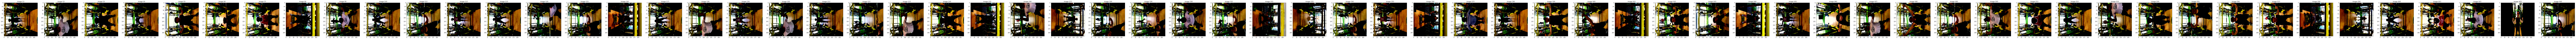

In [10]:
train_generator.show_images(images)

---
## Add TPU Support

In [0]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.train import RMSPropOptimizer
from tensorflow.keras.losses import binary_crossentropy

---
## Create the model


In [16]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))    # include_top=False to remove the top layer
# Freeze all of the layers from the Conv base because we are performing transfer learning
for layer in base_model.layers:
  layer.trainable = False
  
for layer in base_model.layers:
  print(layer, layer.trainable)

58892288/58889256 [==============================] - 1s 0us/step
<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fef46cff518> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fef46cffac8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fef46cc10b8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fef46cc1668> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fef46cc16d8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fef46c74978> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fef46c251d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fef46c250b8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fef46c3eda0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fef46bf5a58> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fef46ba9860> Fals

In [0]:
model = Sequential()

model.add(base_model)

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2050      
Total params: 40,407,874
Trainable params: 25,693,186
Non-trainable params: 14,714,688
_________________________________________________________________


In [22]:
# Convert model to TPU version
tpu_model = tf.contrib.tpu.keras_to_tpu_model(
            model,
            strategy=tf.contrib.tpu.TPUDistributionStrategy(
            tf.contrib.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
    )
)

INFO:tensorflow:Querying Tensorflow master (grpc://10.41.193.122:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 1886222406756956991)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 10623700716949433644)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 9299253635436788046)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 14586757699540672875)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 8787989832709149291)
INFO:tensorflow:*** Available Device: _DeviceAttributes

In [0]:
tpu_model.compile(optimizer=RMSPropOptimizer(learning_rate=1e-3), 
              loss=binary_crossentropy,
              metrics=['acc'])

In [20]:
train_generator.__len__()

48

In [24]:
history = tpu_model.fit_generator(train_generator,
                                  steps_per_epoch=train_generator.__len__(),
                                  epochs=30,
                                  validation_data=validation_generator,
                                  validation_steps=validation_generator.__len__(),
                                  verbose=1)

Epoch 1/30
INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(8,), dtype=tf.int32, name='core_id0'), TensorSpec(shape=(8, 224, 224, 3), dtype=tf.float32, name='vgg16_input_20'), TensorSpec(shape=(8, 2), dtype=tf.float32, name='dense_3_target_10')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Remapping placeholder for vgg16_input
INFO:tensorflow:Remapping placeholder for input_2
INFO:tensorflow:Default: input_2
ERROR:tensorflow:Operation of type Placeholder (tpu_140665623576304/input_2) is not supported on the TPU. Execution will fail if this op is used in the graph. 
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Started compiling


RuntimeError: ignored